# Dam Locations and Population Density (South Africa)

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Setting Global File Path

## define global file path
file_path = "C://Users//riane//Downloads//02_GitHub//problem-set-2"

## define global data path
data_path = file_path + "//01_Dataset"

## define global country path
safrica = data_path + "//South Africa"
ethiopia = data_path + "//Ethiopia"
vietnam = data_path + "//Vietnam"
brazil = data_path + "//Brazil"

In [3]:
# Loading data
safrica_shp = gpd.read_file(safrica + "//SA_MDB_Local_Municipal_Boundary_2018//MDB_Local_Municipal_Boundary_2018.shp")
safrica_dams = pd.read_excel(safrica + "//Dams_south_africa.xlsx")
safrica_popu = pd.read_excel(safrica + "//population_africa.xlsx")

## Data Cleaning

In [4]:
# Inspecting data
safrica_shp

,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Are,Shape__Len,geometry
0,1,197,WC,B,Local Municipality,WC032,Overstrand,Overstrand (WC032),Overstrand Local Municipality,DC3,Overberg,2019-06-25,2.470202e+09,503100.219054,"MULTIPOLYGON (((19.41807 -34.68668, 19.41807 -..."
1,2,138,WC,B,Local Municipality,WC033,Cape Agulhas,Cape Agulhas (WC033),Cape Agulhas Local Municipality,DC3,Overberg,2019-06-25,5.121204e+09,510469.485052,"POLYGON ((20.06351 -34.21699, 20.06491 -34.233..."
2,3,160,WC,B,Local Municipality,WC031,Theewaterskloof,Theewaterskloof (WC031),Theewaterskloof Local Municipality,DC3,Overberg,2019-06-25,4.774032e+09,407619.924636,"POLYGON ((19.2974 -33.88968, 19.31055 -33.9137..."
3,4,142,WC,B,Local Municipality,WC043,Mossel Bay,Mossel Bay (WC043),Mossel Bay Local Municipality,DC4,Garden Route,2019-06-25,2.921636e+09,361538.907987,"POLYGON ((22.12817 -33.85624, 22.13423 -33.869..."
4,5,141,WC,B,Local Municipality,WC042,Hessequa,Hessequa (WC042),Hessequa Local Municipality,DC4,Garden Route,2019-06-25,8.388296e+09,609407.058375,"POLYGON ((21.74781 -33.81114, 21.74785 -33.811..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,209,208,LIM,B,Local Municipality,LIM345,Collins Chabane,Collins Chabane (LIM345),Collins Chabane Local Municipality,DC34,Vhembe,2019-06-25,5.931389e+09,612925.637183,"POLYGON ((31.3449 -22.53453, 31.34739 -22.5420..."
209,210,206,LIM,B,Local Municipality,LIM343,Thulamela,Thulamela (LIM343),Thulamela Local Municipality,DC34,Vhembe,2019-06-25,3.122493e+09,352761.996820,"POLYGON ((30.91065 -22.47558, 30.91192 -22.475..."
210,211,200,LIM,B,Local Municipality,LIM351,Blouberg,Blouberg (LIM351),Blouberg Local Municipality,DC35,Capricorn,2019-06-25,1.130638e+10,568573.089745,"POLYGON ((28.87529 -22.44745, 28.8773 -22.4474..."
211,212,205,LIM,B,Local Municipality,LIM341,Musina,Musina (LIM341),Musina Local Municipality,DC34,Vhembe,2019-06-25,1.217129e+10,820095.819612,"POLYGON ((29.67528 -22.13901, 29.67583 -22.139..."


In [5]:
# Inspecting data
safrica_dams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10312 entries, 0 to 10311
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name of dam    10311 non-null  object 
 1   Latitude deg   10310 non-null  float64
 2   Lat min        10310 non-null  float64
 3   Lat sec        10310 non-null  float64
 4   Longitude deg  10310 non-null  float64
 5   Long min       10310 non-null  float64
 6   Long sec       10310 non-null  float64
dtypes: float64(6), object(1)
memory usage: 564.1+ KB


In [6]:
# Inspecting data
safrica_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Municipality▲   213 non-null    object
 1   Own             213 non-null    object
 2   Province        213 non-null    object
 3   Capital         212 non-null    object
 4   Area            213 non-null    object
 5   Population      213 non-null    object
 6   Density         213 non-null    object
dtypes: object(7)
memory usage: 11.8+ KB


In [7]:
# Checking for NA
safrica_popu.isna().sum()

Municipality▲     0
Own               0
Province          0
Capital           1
Area              0
Population        0
Density           0
dtype: int64

In [8]:
# Cleaning data
safrica_popu['Municipality'] = safrica_popu['Municipality▲'].str.replace('\xa0', '', regex=False).str.strip().str.upper()
safrica_shp['MUNICNAME'] = safrica_shp['MUNICNAME'].str.strip().str.upper()


In [9]:
# Comparing municipality names

## make uppercase
safrica_shp['MUNICNAME'].str.upper()
safrica_popu['Municipality'].str.upper()

## 
muni_shp = set(safrica_shp['MUNICNAME'].unique())
muni_popu = set(safrica_popu['Municipality'].unique())

# Print counts
print("Unique in shapefile:", len(muni_shp))
print("Unique in population file:", len(muni_popu))

# Find common and missing municipalities
print("In shapefile not in popu:", muni_shp - muni_popu)
print("In popu not in shapefile:", muni_popu - muni_shp)

Unique in shapefile: 212
Unique in population file: 212
In shapefile not in popu: {'KAGISANO-MOLOPO', 'CHIEF ALBERT LUTHULI', 'NELSON MANDELA BAY', 'CITY OF MATLOSANA', 'DR PIXLEY KA ISAKA SEME', 'DR AB XUMA', 'RAND WEST CITY', 'BITOU', 'JOE MOROLONG', 'ETHEKWINI', 'LOCAL MUNICIPALITY OF MADIBENG', 'MANGAUNG', 'CITY OF TSHWANE', 'KAI !GARIB', 'NQUTU', 'KHÂI-MA', '!KHEIS', 'STEVE TSHWETE', 'MALUTI-A-PHOFUNG', 'DR BEYERS NAUDE', 'BUFFALO CITY'}
In popu not in shapefile: {'MADIBENG', 'NELSON MANDELA BAY- PORT ELIZABETH', 'BITOU - PLETTENBERG BAY', 'MANGAUNG- BLOEMFONTEIN', 'KAGISANO/MOLOPO', 'NQUTHU', 'CITY OF TSHWANE- PRETORIA', 'ETHEKWINI- DURBAN', 'ENGCOBO', 'ALBERT LUTHULI', 'JOE MOROLONG(MOSHAWENG)', 'STEVE TSHWETE- MIDDELBURG', 'DR BEYERS NAUDÉ', 'MALUTI A PHOFUNG', 'KHEIS', 'BUFFALO CITY- EAST LONDON', 'KAI GARIB', 'CITY OF MATLOSANA- KLERKSDORP', 'KHAI MA', 'PIXLEY KA SEME', 'RAND WEST CITY- RANDFONTEIN'}


In [10]:
# Replacing col values to match
replacements = {
    'KAGISANO/MOLOPO': 'KAGISANO-MOLOPO', 
    'DR BEYERS NAUDÉ': 'DR BEYERS NAUDE', 
    'MALUTI A PHOFUNG': 'MALUTI-A-PHOFUNG', 
    'KHEIS': '!KHEIS', 
    'MANGAUNG- BLOEMFONTEIN': 'MANGAUNG', 
    'CITY OF TSHWANE- PRETORIA': 'CITY OF TSHWANE', 
    'ETHEKWINI- DURBAN': 'ETHEKWINI', 
    'STEVE TSHWETE- MIDDELBURG': 'STEVE TSHWETE', 
    'KHAI MA': 'KHÂI-MA', 
    'BUFFALO CITY- EAST LONDON': 'BUFFALO CITY', 
    'BITOU - PLETTENBERG BAY': 'BITOU', 
    'MADIBENG': 'LOCAL MUNICIPALITY OF MADIBENG', 
    'PIXLEY KA SEME': 'DR PIXLEY KA ISAKA SEME', 
    'JOE MOROLONG(MOSHAWENG)': 'JOE MOROLONG', 
    'NQUTHU': 'NQUTU', 
    'engcobo': 'DR AB XUMA', 
    'ALBERT LUTHULI': 'CHIEF ALBERT LUTHULI', 
    'RAND WEST CITY- RANDFONTEIN': 'RAND WEST CITY', 
    'CITY OF MATLOSANA- KLERKSDORP': 'CITY OF MATLOSANA', 
    'KAI GARIB':'KAI !GARIB', 
    'NELSON MANDELA BAY- PORT ELIZABETH': 'NELSON MANDELA BAY'
}

safrica_popu['Municipality'] = safrica_popu['Municipality'].replace(replacements)

## Preparation

In [11]:
# Dropping unnecessary columns
safrica_pdensity = safrica_popu[['Municipality', 'Density']].copy()

# Change ',' to '.' and convert to float
safrica_pdensity['Density'] = (
    safrica_pdensity['Density']
    .str.replace(' ', '')
    .str.replace(',', '.')
    .astype(float)
)

safrica_pdensity

,Municipality,Density
0,ABAQULUSI,57.3
1,CHIEF ALBERT LUTHULI,44.6
2,ALFRED DUMA,110.3
3,AMAHLATHI,25.7
4,BA-PHALABORWA,25.2
...,...,...
208,UPHONGOLO,48.7
209,VICTOR KHANYE,67.7
210,WALTER SISULU,7.9
211,WINNIE MADIKIZELA-MANDELA,144.9


In [12]:
# Merging popu data to shp
safrica_shp_density = safrica_shp.merge(
    safrica_pdensity,
    left_on='MUNICNAME',
    right_on='Municipality',
    how='left'  # or 'inner' if you want only matches
)

safrica_shp_density

,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Are,Shape__Len,geometry,Municipality,Density
0,1,197,WC,B,Local Municipality,WC032,OVERSTRAND,Overstrand (WC032),Overstrand Local Municipality,DC3,Overberg,2019-06-25,2.470202e+09,503100.219054,"MULTIPOLYGON (((19.41807 -34.68668, 19.41807 -...",OVERSTRAND,79.1
1,2,138,WC,B,Local Municipality,WC033,CAPE AGULHAS,Cape Agulhas (WC033),Cape Agulhas Local Municipality,DC3,Overberg,2019-06-25,5.121204e+09,510469.485052,"POLYGON ((20.06351 -34.21699, 20.06491 -34.233...",CAPE AGULHAS,11.6
2,3,160,WC,B,Local Municipality,WC031,THEEWATERSKLOOF,Theewaterskloof (WC031),Theewaterskloof Local Municipality,DC3,Overberg,2019-06-25,4.774032e+09,407619.924636,"POLYGON ((19.2974 -33.88968, 19.31055 -33.9137...",THEEWATERSKLOOF,42.8
3,4,142,WC,B,Local Municipality,WC043,MOSSEL BAY,Mossel Bay (WC043),Mossel Bay Local Municipality,DC4,Garden Route,2019-06-25,2.921636e+09,361538.907987,"POLYGON ((22.12817 -33.85624, 22.13423 -33.869...",MOSSEL BAY,70.0
4,5,141,WC,B,Local Municipality,WC042,HESSEQUA,Hessequa (WC042),Hessequa Local Municipality,DC4,Garden Route,2019-06-25,8.388296e+09,609407.058375,"POLYGON ((21.74781 -33.81114, 21.74785 -33.811...",HESSEQUA,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,209,208,LIM,B,Local Municipality,LIM345,COLLINS CHABANE,Collins Chabane (LIM345),Collins Chabane Local Municipality,DC34,Vhembe,2019-06-25,5.931389e+09,612925.637183,"POLYGON ((31.3449 -22.53453, 31.34739 -22.5420...",COLLINS CHABANE,88.7
211,210,206,LIM,B,Local Municipality,LIM343,THULAMELA,Thulamela (LIM343),Thulamela Local Municipality,DC34,Vhembe,2019-06-25,3.122493e+09,352761.996820,"POLYGON ((30.91065 -22.47558, 30.91192 -22.475...",THULAMELA,218.0
212,211,200,LIM,B,Local Municipality,LIM351,BLOUBERG,Blouberg (LIM351),Blouberg Local Municipality,DC35,Capricorn,2019-06-25,1.130638e+10,568573.089745,"POLYGON ((28.87529 -22.44745, 28.8773 -22.4474...",BLOUBERG,20.1
213,212,205,LIM,B,Local Municipality,LIM341,MUSINA,Musina (LIM341),Musina Local Municipality,DC34,Vhembe,2019-06-25,1.217129e+10,820095.819612,"POLYGON ((29.67528 -22.13901, 29.67583 -22.139...",MUSINA,12.7


In [13]:
# Convert to decimal degree 
def dms_to_dd(degree, minute, second):
    return degree + (minute / 60) + (second / 3600)

safrica_dams['lat_dd'] = dms_to_dd(safrica_dams['Latitude deg'], safrica_dams['Lat min'], safrica_dams['Lat sec'])
safrica_dams['lon_dd'] = dms_to_dd(safrica_dams['Longitude deg'], safrica_dams['Long min'], safrica_dams['Long sec'])

# Change sign of lat
safrica_dams['lat_dd'] = -safrica_dams['lat_dd'].abs()

safrica_dams

,Name of dam,Latitude deg,Lat min,Lat sec,Longitude deg,Long min,Long sec,lat_dd,lon_dd
0,NGOTWANE DAM,25.0,11.0,54.0,25.0,48.0,48.0,-25.198333,25.813333
1,MAKGOPANE DAM,25.0,5.0,54.2,25.0,52.0,57.0,-25.098389,25.882500
2,ROODEKOPJES DAM,25.0,24.0,24.0,27.0,34.0,39.0,-25.406667,27.577500
3,HARTBEESPOORT DAM,25.0,43.0,32.3,27.0,50.0,54.1,-25.725639,27.848361
4,BUFFELSPOORT DAM,25.0,46.0,49.5,27.0,29.0,14.5,-25.780417,27.487361
...,...,...,...,...,...,...,...,...,...
10307,TSHAKHUMA DAM,23.0,1.0,58.0,30.0,16.0,55.0,-23.032778,30.281944
10308,KORENTEPOORT DAM,34.0,0.0,17.4,21.0,9.0,56.4,-34.004833,21.165667
10309,GRASSRIDGE DAM,31.0,46.0,4.2,25.0,27.0,57.9,-31.767833,25.466083
10310,KNELLPOORT DAM,29.0,46.0,54.4,26.0,53.0,19.2,-29.781778,26.888667


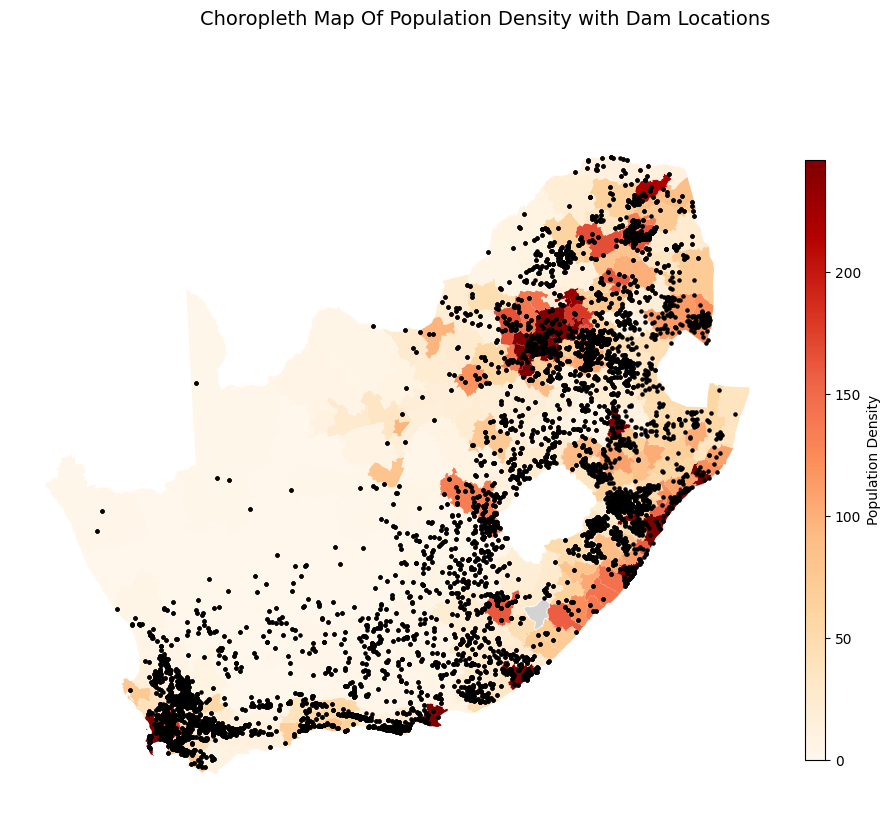

In [14]:
# Plot the density and dam locations
safrica_dams = gpd.GeoDataFrame(
    safrica_dams,
    geometry=gpd.points_from_xy(safrica_dams['lon_dd'], safrica_dams['lat_dd']),
    crs="EPSG:4326"  
)

safrica_shp_density_proj = safrica_shp_density.to_crs(epsg=32735)
safrica_dams_proj = safrica_dams.to_crs(safrica_shp_density_proj.crs)

# keep only dams within South Africa
dams_within_sa = gpd.sjoin(
    safrica_dams_proj,
    safrica_shp_density_proj[['geometry']],  
    how="inner",
    predicate="within"
)

fig, ax = plt.subplots(figsize=(10, 10))

# Base map in light gray
safrica_shp_density_proj.plot(ax=ax, edgecolor='white', facecolor='lightgray')

# Choropleth overlay
safrica_shp_density_proj.plot(
    ax=ax,
    column='Density',
    cmap='OrRd',
    linewidth=0.1,
    legend=False,
    vmax=safrica_shp_density_proj['Density'].quantile(0.93)
)

# Dam points in black
dams_within_sa.plot(ax=ax, color='black', markersize=5)

# Adjust gradient
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  

# Plot of colorbar on the custom axis
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=safrica_shp_density_proj['Density'].quantile(0.93)))
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('Population Density')

ax.set_aspect('equal')
fig.suptitle('Choropleth Map Of Population Density with Dam Locations', x=0.6, y=0.95, fontsize=14)
ax.set_axis_off()
plt.show()

# Population Density and ERSS Sample Villages (Ethiopia)
Darker regions represent high density while lighter ones represent less dense regions. 
Major roads are the ones with thicker lines while the high-voltage electricity grid are the thinner, straighter lines.

In [15]:
# Loading data
ethiopia_shp = gpd.read_file(ethiopia + "//Ethiopia_AdminBoundaries-shp//Ethiopia_AdminBoundaries.shp")
ethiopia_gen = gpd.read_file(ethiopia + "//Ethiopia_-_generators-shp//Ethiopia_-_generators.shp")
ethiopia_roads = gpd.read_file(ethiopia + "//ethiopia_roads//Ethiopia_Roads.shp")
ethiopia_transmission = gpd.read_file(ethiopia + "//Ethiopia-electricity-transmission-network//Ethiopia Electricity Transmission Network.shp")
ethiopia_popu = pd.read_csv(ethiopia + "//eth_pd_2020_1km_ASCII_XYZ//eth_pd_2020_1km_ASCII_XYZ.csv")

C:\Users\riane\anaconda3\envs\ds4upse\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured LineString' is converted to 'LineString'
  return ogr_read(


In [16]:
ethiopia_popu

,X,Y,Z
0,37.919583,14.895417,48.259846
1,37.927917,14.895417,37.829285
2,37.911250,14.887083,59.368065
3,37.919583,14.887083,78.727852
4,37.927917,14.887083,53.346004
...,...,...,...
1332607,39.477917,3.337084,162.577164
1332608,39.486250,3.337084,129.951584
1332609,39.494583,3.337084,122.874435
1332610,39.502917,3.337084,114.271080


In [17]:
# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(ethiopia_popu["X"], ethiopia_popu["Y"])]
pop_gdf = gpd.GeoDataFrame(ethiopia_popu, geometry=geometry, crs="EPSG:4326")

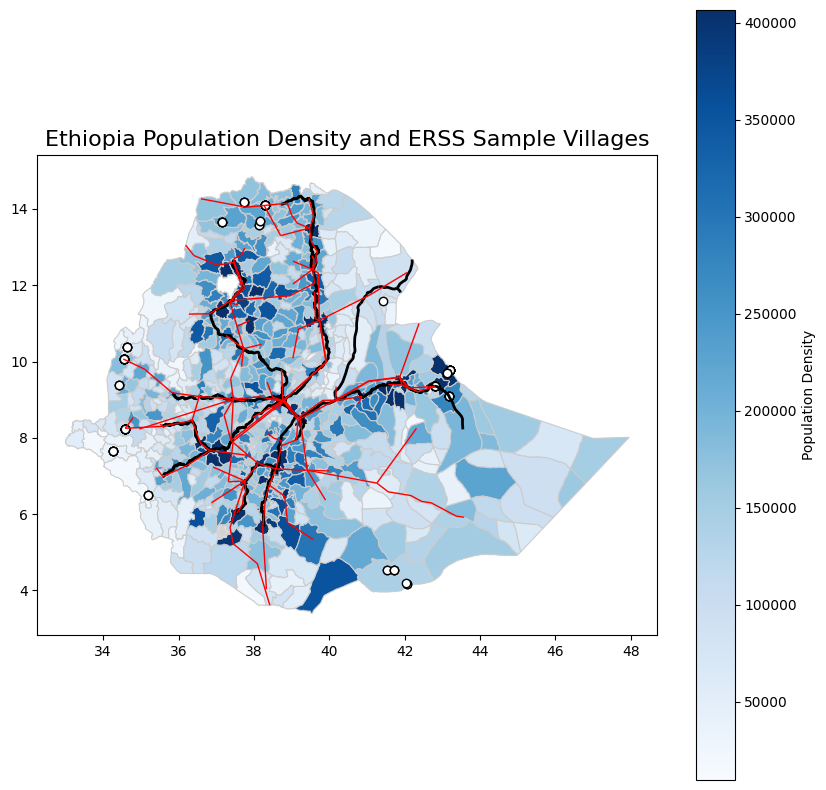

In [18]:
ethiopia_proj = ethiopia_shp.to_crs(epsg=4326)
ethiopia_roads_proj = ethiopia_roads.to_crs(epsg=4326)
ethiopia_gen_proj = ethiopia_gen.to_crs(epsg=4326)

#Spatial join to assign population to a woreda
joined = gpd.sjoin(pop_gdf, ethiopia_proj, how="inner", predicate="within")

# Aggregate pop density by admin unit
density_by_admin = joined.groupby("WOREDANO_").agg({"Z": "sum"}).reset_index()

# Merge back into admin shapefile
choropleth = ethiopia_proj.merge(density_by_admin, on="WOREDANO_")
fig, ax = plt.subplots(figsize=(10, 10))

# Base map in light gray
ethiopia_proj.plot(ax=ax, edgecolor='white', facecolor='lightgray')

# Chloropleth
choropleth.plot(column="Z", cmap="Blues", linewidth=0.8, edgecolor="0.8",
                legend=True, legend_kwds={'label': "Population Density"},
                ax=ax, vmax=density_by_admin['Z'].quantile(0.95)
)

# Roads black line
ethiopia_roads_proj.plot(ax=ax, color='black', linewidth=2)

# Generators
ethiopia_gen_proj.plot(ax=ax, edgecolor='black', facecolor='white')

# Transmission lines
ethiopia_transmission.plot(ax=ax, color='red', linewidth=1)

plt.title("Ethiopia Population Density and ERSS Sample Villages", fontsize=16)
plt.show()

# Road Maps of Vietnam (Vietnam)

In [19]:
# Loading data
vietnam_shp = gpd.read_file(vietnam + "//gadm41_VNM_shp//gadm41_VNM_3.shp")
vietnam_roads = gpd.read_file(vietnam + "//vietnam-latest-free.shp//gis_osm_roads_free_1.shp")

In [20]:
# Use unclassified for all unknown/unclassified types
vietnam_roads['fclass'] = vietnam_roads['fclass'].replace('unknown', 'unclassified')

In [21]:
# Classify the roads
classification = {
    'major': [
        'primary', 'secondary', 'tertiary', 'trunk'
    ],
    'minor': [
        'residential', 'unclassified', 'service', 'living_street'
    ],
    'dual_carriageway': [
        'primary_link', 'secondary_link', 'tertiary_link', 'trunk_link'
    ],
    'freeway': [
        'motorway', 'motorway_link'
    ],
    'other': [
        'footway', 'path', 'pedestrian', 'cycleway', 'track', 'steps',
        'track_grade1', 'track_grade2', 'track_grade3', 'track_grade4',
        'track_grade5', 'bridleway', 'busway', 'unclassified'  # 'unknown' can be included or cleaned
    ]
}

## lookup function
def classify_road_type(fclass):
    for category, roads in classification.items():
        if fclass in roads:
            return category
    return 'other'

# Apply to data
vietnam_roads['road_class'] = vietnam_roads['fclass'].apply(classify_road_type)

In [22]:
vietnam_roads['road_class'].unique()

array(['other', 'minor', 'major', 'dual_carriageway', 'freeway'],
      dtype=object)

In [23]:
# Change labels
roadtypes = {
    'other': 'Other', 
    'minor': 'Minor', 
    'major': 'Major', 
    'dual_carriageway': 'Dual Carriageway', 
    'freeway': 'Freeway'
}

vietnam_roads['road_class'] = vietnam_roads['road_class'].replace(roadtypes)

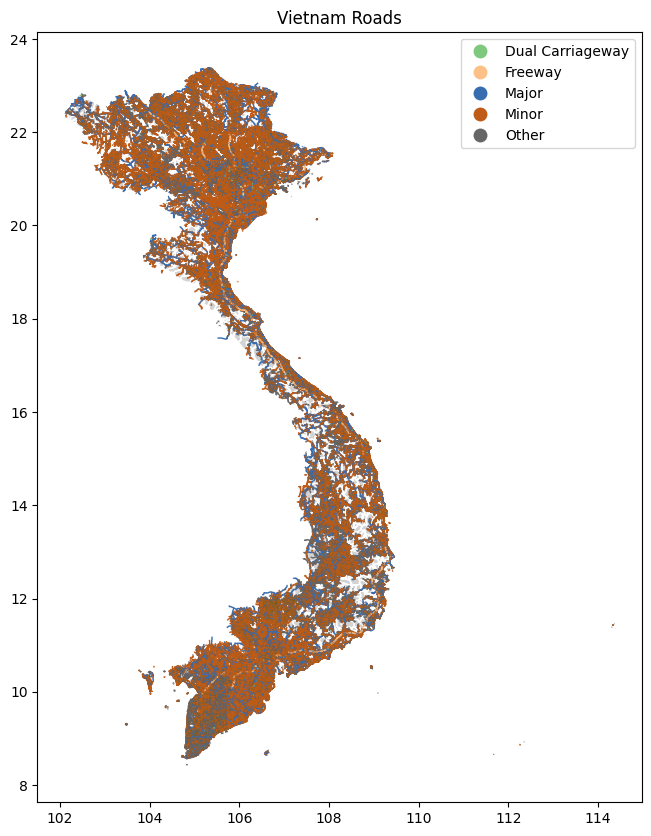

In [24]:
# Plotting road types on base map
vietnam_proj = vietnam_shp.to_crs(epsg=4326)
vietnam_roads_proj = vietnam_roads.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(10, 10))

# Base map
vietnam_proj.plot(ax=ax, edgecolor='white', facecolor='lightgray')

# Road types
vietnam_roads.plot(column='road_class', ax=ax, legend=True, cmap='Accent', linewidth=1)

ax.set_title('Vietnam Roads')
plt.show()

# Capital and Main Road Infrastructure (Brazil)

In [25]:
# Loading data
brazil_shp = gpd.read_file(brazil + "//Data//GIS_data//outline//outline_mainland_only_prj.shp")
brazil_roads = gpd.read_file(brazil + "//Data//GIS_data//roads//2010//highways_2010_prj.shp")
brazil_city = gpd.read_file(brazil + "//Data//GIS_data//cities//brazil_capital_cities_prj.shp")